In [ ]:
  #make sure fastai is up to date 
  !curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [ ]:
#read in standard data science libs
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#import google drive package
from  google.colab import drive

In [ ]:
from fastai.vision import *

In [ ]:
# connect workbook to google drive folder to access images 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
#save path to project folder 
root_path = 'gdrive/My Drive/AI_Projects/'

In [ ]:
# uncomment to make balls folder 
#(Path(root_path)/'AI_Projects').mkdir(parents=True, exist_ok=True)
(Path(root_path)/'Notes').mkdir(parents=True, exist_ok=True)


In [ ]:
#save path for balls folder that contains images and variable tags 
proj_path = 'gdrive/My Drive/AI_Projects/Notes/'

In [ ]:
#make folder names 
folders = ['100','500','200']

In [ ]:
#create all folders in /Balls
for i in folders:
 path = Path(proj_path)
 dest = (path/i).mkdir(parents=True, exist_ok=True)

In [ ]:
#save fastai path 
p_path = Path(proj_path)

In [ ]:
# create image data bunch with 80/20 train test split 
np.random.seed(42)
data = ImageDataBunch.from_folder(p_path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['100', '200', '500']

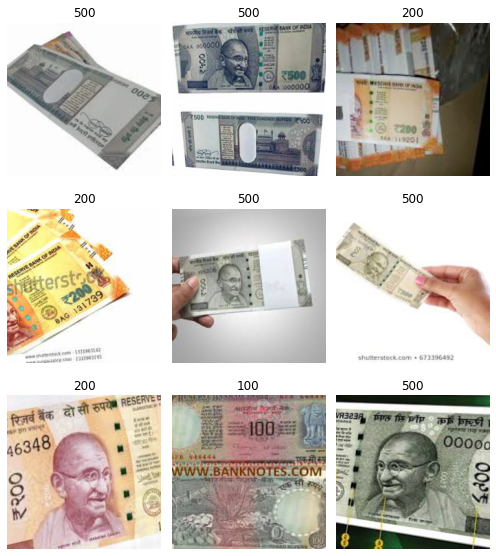

In [ ]:
#show sample of images 
data.show_batch(rows=3,figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['100', '200', '500'], 3, 431, 107)

In [ ]:
#create cnn_learner object
# use resnet 34 for transfer learning 
learn = cnn_learner(data, models.resnet34, metrics=error_rate)


Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [ ]:
# train 8 epochs of the model 
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,1.691300,1.005108,0.411215,01:15
1,1.098927,0.609973,0.196262,00:09
2,0.782262,0.299855,0.065421,00:07
3,0.603664,0.187928,0.065421,00:07
4,0.507433,0.101462,0.046729,00:07
5,0.424041,0.093467,0.046729,00:07
6,0.352568,0.092020,0.037383,00:07
7,0.305541,0.090794,0.028037,00:07


In [ ]:
#save model
learn.save('model1_34', return_path=True)

PosixPath('gdrive/My Drive/AI_Projects/Notes/models/model1_34.pth')

In [ ]:
# unfreeze model. Lets you train earlier layers 
learn.unfreeze()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


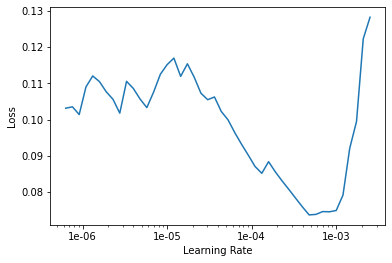

In [ ]:
#find optimal learning rates 
learn.lr_find()
learn.recorder.plot()

In [ ]:
# fit whole model with new learning rates 
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-3), wd=.001)

epoch,train_loss,valid_loss,error_rate,time
0,0.116604,0.085511,0.037383,00:08
1,0.089068,0.111655,0.028037,00:08


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


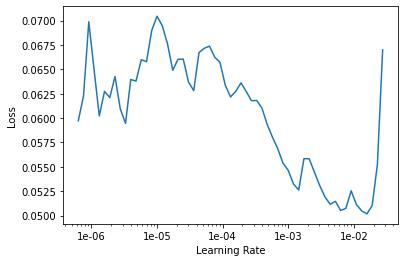

In [ ]:
learn.freeze()
learn.lr_find()
learn.recorder.plot()

In [ ]:
learn.save('model2_34')

In [ ]:
learn.load('model1_34')
interp = ClassificationInterpretation.from_learner(learn)

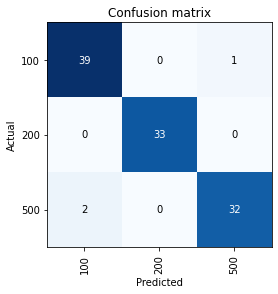

In [ ]:
#plot results of model on validation set 
interp.plot_confusion_matrix()

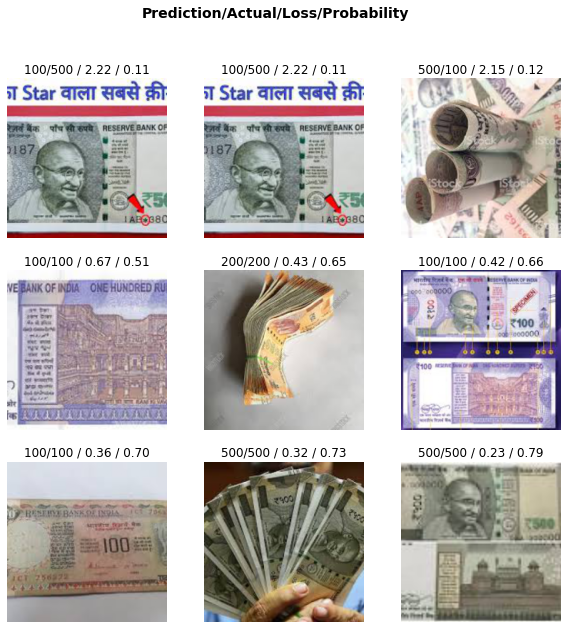

In [ ]:
# plot top losses (most wrong)
interp.plot_top_losses(9, figsize=(10,10))

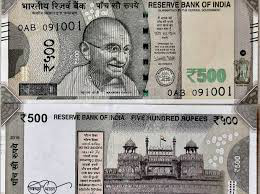

In [ ]:
#img_golf= open_image(Path(root_path)/'Balls_valid'/'golf_valid.jpg')
#img_golf
#img_tennis= open_image(Path(root_path)/'Balls_valid'/'tennis_valid.jpg')
#img_tennis
img_dragon= open_image(Path(root_path)/'Notes'/'500'/'500_5.jpg')
img_dragon

In [ ]:
#pred_class,pred_idx,outputs = learn.predict(img_golf)
#pred_class
#pred_class,pred_idx,outputs = learn.predict(img_tennis)
#pred_class
pred_class,pred_idx,outputs = learn.predict(img_dragon)
pred_class

Category tensor(2)

In [ ]:
outputs

tensor([9.1041e-12, 1.0000e+00, 1.1071e-10])